### The following is a code which implements the ensemble sampler from the [emcee](http://dan.iel.fm/emcee/current/ "MCMC python")  considering a toy multivariate example. 

In [1]:

import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

import emcee
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import corner
import acor



/Users/abhisheksubramanian/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Contour plot of the likelihood function is the output of the code below

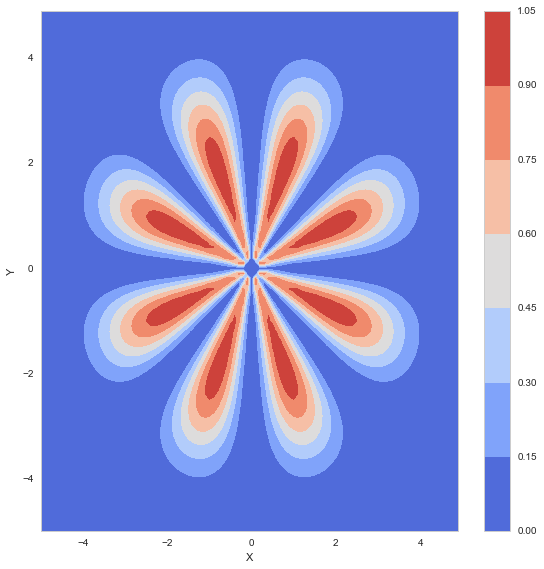

In [2]:
fig = plt.figure()
fig.set_size_inches(8, 8)
#ax = fig.gca(projection='3d')
X = np.arange(-5, 5,0.1)
Y = np.arange(-5, 5,0.1)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-((X**2+Y**2-4)/10)**2)*np.sin(4*np.arctan(Y/X))**2
#Z = np.sin(X**2+Y**2)
surf = plt.contourf(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0)
#ax.set_zlim(-100, 100)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#ax.view_init(90,-270)
fig.colorbar(surf, shrink=1, aspect=20)

plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()

## The log probability is defined below which includes the natural log of the prior and likelihood

In [3]:
def lnprior(p):
    
    if -50.0 <= p[0]<=50.0 and -50.0<=p[1]<=50.0:
        return 0
    return -np.inf


def lnprob1(p):
    #X,y =p
    #a=1
    lp= lnprior(p)
    diff =lp+np.log(np.exp(-((p[0]**2+p[1]**2-4)/10)**2)*np.sin(4*np.arctan(p[1]/p[0]))**2)
   
        
    return diff

## Preparing for the Ensemble here ndim is the number of dimensions in parameter space and the number of walker represents the ensemble

In [4]:

ndim = 2

nwalkers =200

p1 = [np.random.rand(ndim) for i in range(nwalkers)]


## Sampling along with the contours and the distributions are shown below

In [5]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob1,a=2.00)

#pos, prob, state = sampler.run_mcmc(p1,100)
#sampler.reset()

### further to check the features sampling from the place where the previous walker left off which is the pos

In [6]:
pos,lnlike,state=sampler.run_mcmc(p1, 1000)



In [21]:
plt.plot(acor.function(sampler.chain[:,:,0]))

AssertionError: The autocorrelation function can only by computed on a 1D time series.

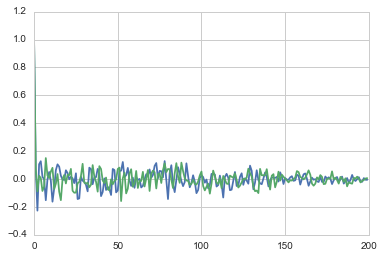

In [8]:
plt.plot(emcee.autocorr.function(p1))
plt.show()

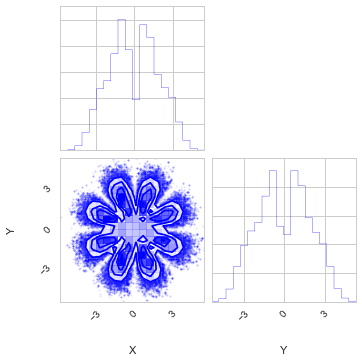

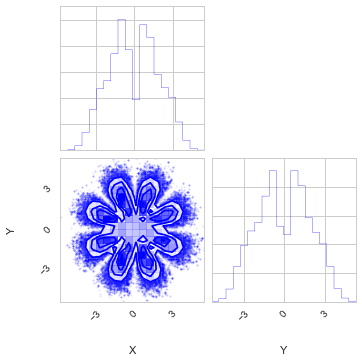

In [9]:

#fig = plt.corner()
fig.set_size_inches(18, 18.5)
corner.corner(sampler.flatchain,color='b',labels=["X",'Y'],alpha=10)

The plots below show the ensembles for both the parameters X and Y and how they move with the number of steps

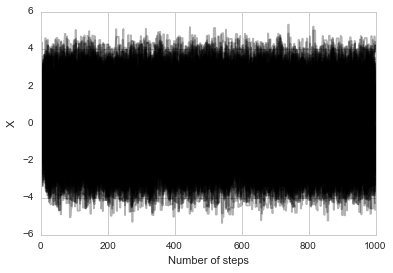

In [10]:
#ax1 = fig.gca(projection='1d')

plt.plot(sampler.chain[:,:,1].T, '-', color='k', alpha=0.3)
plt.xlabel('Number of steps')
plt.ylabel("X")
#ax.hline(alpha_true, color='blue')
plt.show()

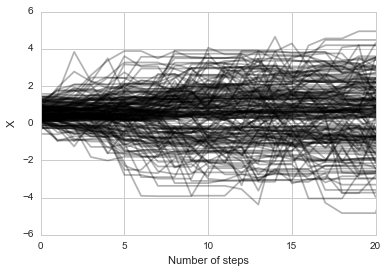

In [11]:
plt.plot(sampler.chain[:,:,0].T, '-', color='k', alpha=0.3)
#ax1.hline(alpha_true, color='blue')
plt.xlabel('Number of steps')
plt.ylabel("X")
plt.xlim(0,20)
plt.show()

 One of the measures which show that the sampling is performed well with the scale parameter a is the mean acceptance fraction which should be in the region 0.25 to 0.5 for a good sampling [emcee sampling example](http://dan.iel.fm/emcee/current/user/quickstart/#how-to-sample-a-multi-dimensional-gaussian "example")

In [12]:
print "mean acceptance fraction of the samples in each walker %0.3f " %np.mean(sampler.acceptance_fraction)

mean acceptance fraction of the samples in each walker 0.508 


R Gelman and Rubin p varience of chain / 

In [14]:
sampler.get_autocorr_time(window=50)

array([ 44.83179596,  54.2650258 ])

In [15]:
sample = sampler.flatchain

In [16]:
sample.shape

(200000, 2)

In [19]:
for result in sampler.sample(p1,iterations=1000,storechain=False):
    position = result[0]
    rccc =sampler.chain[0]
    if 0<np.var(position[:,0])<0.1 and 0< np.var(position[:,1])<0.1:
        print "the number of iterations %f" %len(rccc)
        break

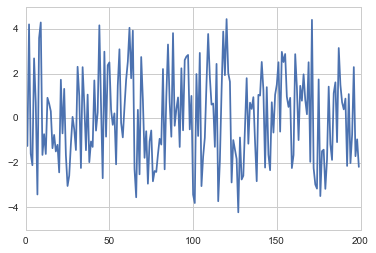

In [20]:
plt.plot(position[:,0])

In [22]:
i=0
best =[]
for pos, lnprob, state in sampler.sample(p1,iterations=3000):
    i+=1
    best.append(np.ndarray.tolist(pos[np.argmax(lnprob), :]))
    #plt.plot(i,np.mean(best[0]),'bo',alpha=0.2)

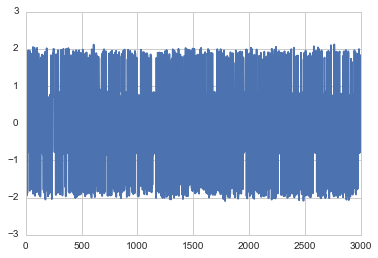

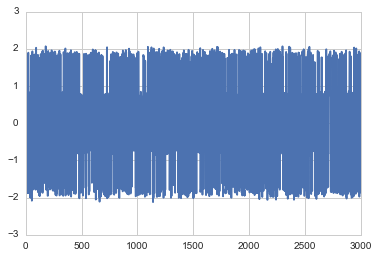

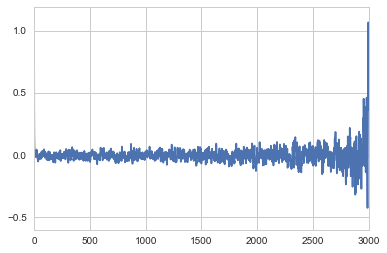

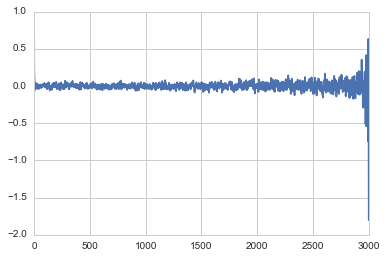

In [27]:
par_x = [val[0] for val in best]
plt.plot(par_x)
plt.show()
par_y = [val[1] for val in best]
plt.plot(par_y)
plt.show()
plt.plot(acor.function(par_x))
plt.show()
plt.plot(acor.function(par_y))

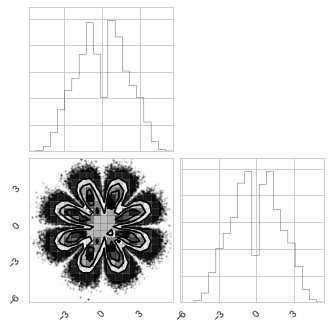

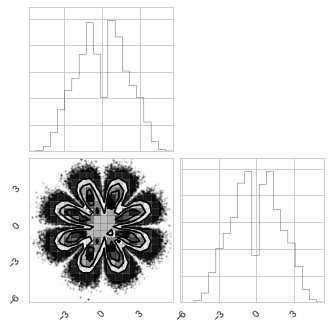

In [32]:
corner.corner(sampler.flatchain[:])

[16.44258191694968, 38.69788528008014]


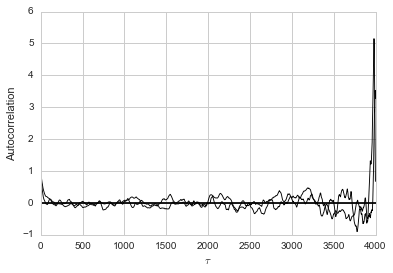

In [34]:

import acor
f = [acor.function(np.mean(sampler.chain[:, :, i], axis=0))
     for i in range(2)]
print([acor.acor(np.mean(sampler.chain[:, :, i], axis=0))[0]
       for i in range(2)])
ax = plt.figure().add_subplot(111)
for i in range(2):
    ax.plot(f[i][:], "k", lw=0.9)
ax.axhline(0, color="k")
#ax.set_xlim(0, 200)
ax.set_xlabel(r"$\tau$")
ax.set_ylabel(r"Autocorrelation")
#ax.set_ylim(0,24)
#ax.figure.savefig("acor.png", transparent=True, dpi=300)

In [35]:
x_samples = sampler.flatchain[:,0]
y_samples = sampler.flatchain[:,1]

x_std = x_samples.std()
y_std = y_samples.std()

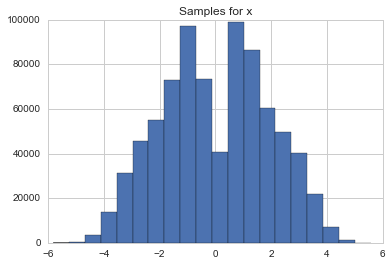

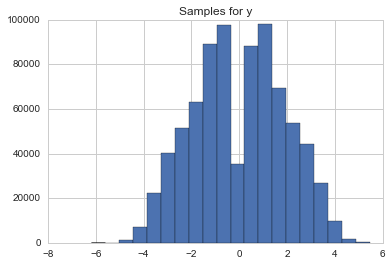

In [36]:
plt.hist(x_samples, 20)
plt.title("Samples for x")
plt.show()
plt.title("Samples for y")
plt.hist(y_samples, 20)
plt.show()

In [37]:
sampler.chain[:,:,0].shape

(200, 4000)

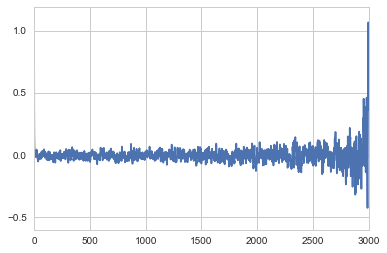

In [39]:
import acor

plt.plot(acor.function(par_x))
#plt.xlim(0,100)

the link to the [convergence diagnostics](http://www.people.fas.harvard.edu/~plam/teaching/methods/convergence/convergence_print.pdf"Useful link")  

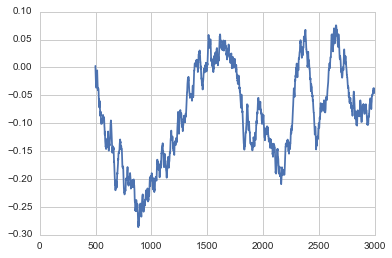

In [74]:
j= [val for val in range(3000)]
parameterx = pd.Series(par_x)
plt.plot(j,pd.rolling_mean(parameterx,window=500))
plt.show()